In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px                                           # <-- for specialized plots
from PIL import Image
from wordcloud import WordCloud, STOPWORDS                            # <-- To Check most pertinent parts of textual data
sns.set()                                                             # <-- set plot style


In [ ]:
data = pd.read_csv('/content/cleaned_data2 (1).csv')

In [ ]:
data.head()

,id,title,year,genres,first_three_actors,director,original_language,imdb_id
0,862,Toy Story,1995,"Animation, Comedy, Family","Tom Hanks, Tim Allen, Don Rickles",John Lasseter,en,tt0114709
1,8844,Jumanji,1995,"Adventure, Fantasy, Family","Robin Williams, Jonathan Hyde, Kirsten Dunst",Joe Johnston,en,tt0113497
2,15602,Grumpier Old Men,1995,"Romance, Comedy","Walter Matthau, Jack Lemmon, Ann-Margret",Howard Deutch,en,tt0113228
3,31357,Waiting to Exhale,1995,"Comedy, Drama, Romance","Whitney Houston, Angela Bassett, Loretta Devine",Forest Whitaker,en,tt0114885
4,11862,Father of the Bride Part II,1995,Comedy,"Steve Martin, Diane Keaton, Martin Short",Charles Shyer,en,tt0113041


In [ ]:
## Exploring Genre Categories

movie_genre = pd.DataFrame(data['genres'].str.split(",").tolist(),
                           index = data['id']).stack()
movie_genre = movie_genre.reset_index([0, 'id'])
movie_genre.columns = ['movieId', 'Genre']

movie_genre.head(10)

,movieId,Genre
0,862,Animation
1,862,Comedy
2,862,Family
3,8844,Adventure
4,8844,Fantasy
5,8844,Family
6,15602,Romance
7,15602,Comedy
8,31357,Comedy
9,31357,Drama


<ipython-input-5-cb1bb62c09b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=movie_genre, palette='CMRmap',


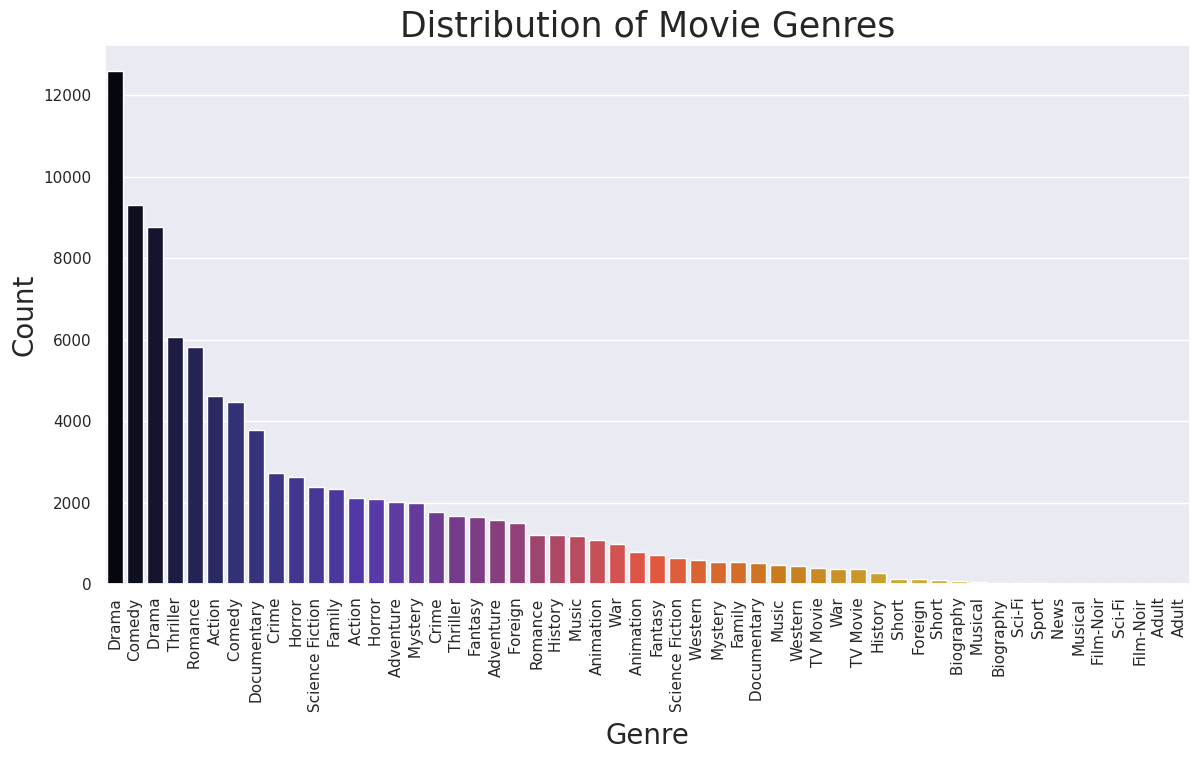

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Genre', data=movie_genre, palette='CMRmap',
              order=movie_genre['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()


Mere looking at the graph, we can tell that `Drama, Comedy, Thriller and Romance` stand out as the popular movie genres

Several factors attributes to why these genres stand out. Hence, Let us get an interesting wordcloud to showcase movie titles and the count of ratings to see if we could get any further insight on the movies

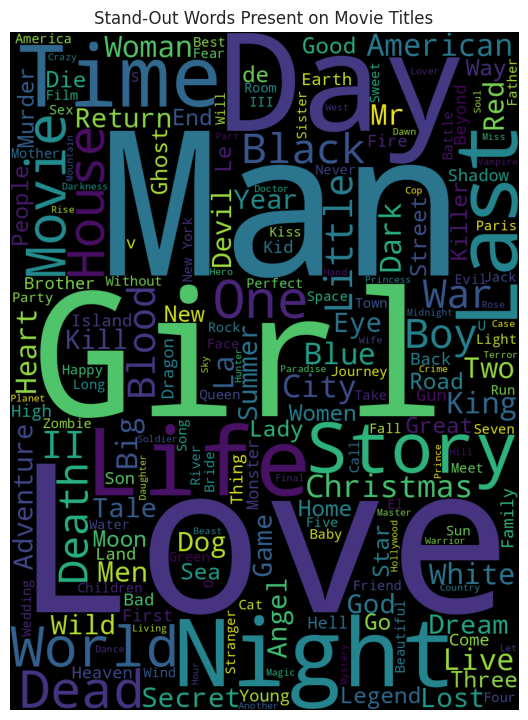

In [ ]:
# Wordcloud of movie titles
movie = data['title'] = data['title'].astype('str')
wordcloud = ' '.join(movie)
title_wordcloud = WordCloud(stopwords = STOPWORDS,background_color = 'Black',
                            height = 1200, width = 900).generate(wordcloud)
plt.figure(figsize = (14,7), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Stand-Out Words Present on Movie Titles')
plt.tight_layout(pad=0)
plt.show()

Obviously speaking; This simple means, Movies with words such as `LOVE`, `STORY`, `GIRL`, `MAN`, `NIGHT`, `LIFE`, gains more views and will tend to be rated more than others, and you know why; `SEX CONTENT`. No wonder there have been a marketing drive to paint any and every product with it in the past century. Well, Let's leave it at that. `It simply gets attention.`

### Looking at Timestamp (Year)
 People will choose to watch certain kinds of moovies at certain hours, Day, or Month of the Year. As the saying Goes,` Know your customers, Own the Market`; So let's study the time series activities of our participants.

In [ ]:
## Convert mMvie Data from Year to Day of week, and Month
data['time_dt'] = pd.to_datetime(data['year'], format = '%Y')

data['month'] = data['time_dt'].dt.month
data['day of week'] = data['time_dt'].dt.dayofweek

In [ ]:
data.head()

,id,title,year,genres,first_three_actors,director,original_language,imdb_id,time_dt,month,day of week
0,862,Toy Story,1995,"Animation, Comedy, Family","Tom Hanks, Tim Allen, Don Rickles",John Lasseter,en,tt0114709,1995-01-01,1,6
1,8844,Jumanji,1995,"Adventure, Fantasy, Family","Robin Williams, Jonathan Hyde, Kirsten Dunst",Joe Johnston,en,tt0113497,1995-01-01,1,6
2,15602,Grumpier Old Men,1995,"Romance, Comedy","Walter Matthau, Jack Lemmon, Ann-Margret",Howard Deutch,en,tt0113228,1995-01-01,1,6
3,31357,Waiting to Exhale,1995,"Comedy, Drama, Romance","Whitney Houston, Angela Bassett, Loretta Devine",Forest Whitaker,en,tt0114885,1995-01-01,1,6
4,11862,Father of the Bride Part II,1995,Comedy,"Steve Martin, Diane Keaton, Martin Short",Charles Shyer,en,tt0113041,1995-01-01,1,6


### Add Code below to merged data that has rating

In [ ]:
#à Group rating by Day-of-Week
dt = data.groupby(['day of week'])['rating'].count().reset_index()

# Making a line Plot of the grouping
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['day of week'],dt['rating']); plt.xlabel('Day of Week'); plt.ylabel('Number of votes'); plt.title('Number of votes per Day')
plt.show()

KeyError: 'Column not found: rating'

In [ ]:
## Grouping rating by Month

dt = data.groupby(['month'])['rating'].count().reset_index()

# Making a line Plot of the grouping
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['month'],dt['rating']); plt.xlabel('Month of the Year')
plt.ylabel('Number of votes'); plt.title('Number of votes per Month')
plt.show()

**PS** I don't have the merged data that contains both the cleaned_movie data and the ratings column.

- This will help to inform users about the best period  to release movies based on the plot (showing when movies receives lowest and highest ratings)

- The second plot shows the period (month) where movie watchers show alot of interest based on the ratings provided.